In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
data = pd.read_pickle('Building-5-Copro VZW/building_5_cnsumptions.pkl')

In [5]:
data.index = pd.to_datetime(data.index)
data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day
data['week'] = data.index.week
data['day of year'] = data.index.dayofyear
data['day of week'] = data.index.dayofweek
data.head()

,Valeur,year,month,day,week,day of year,day of week
Date,,,,,,,
2014-01-06 02:00:00,0.0,2014,1,6,2,6,0
2014-01-06 02:15:00,0.0,2014,1,6,2,6,0
2014-01-06 02:30:00,0.0,2014,1,6,2,6,0
2014-01-06 02:45:00,0.0,2014,1,6,2,6,0
2014-01-06 03:00:00,0.0,2014,1,6,2,6,0


In [6]:
data[data.index.duplicated(keep=False)]

,Valeur,year,month,day,week,day of year,day of week
Date,,,,,,,
2014-10-26 02:00:00,0.000,2014,10,26,43,299,6
2014-10-26 02:15:00,0.025,2014,10,26,43,299,6
2014-10-26 02:30:00,0.000,2014,10,26,43,299,6
2014-10-26 02:45:00,0.000,2014,10,26,43,299,6
2014-10-26 02:00:00,0.000,2014,10,26,43,299,6
2014-10-26 02:15:00,0.000,2014,10,26,43,299,6
2014-10-26 02:30:00,0.000,2014,10,26,43,299,6
2014-10-26 02:45:00,0.025,2014,10,26,43,299,6
2015-10-25 02:00:00,0.000,2015,10,25,43,298,6


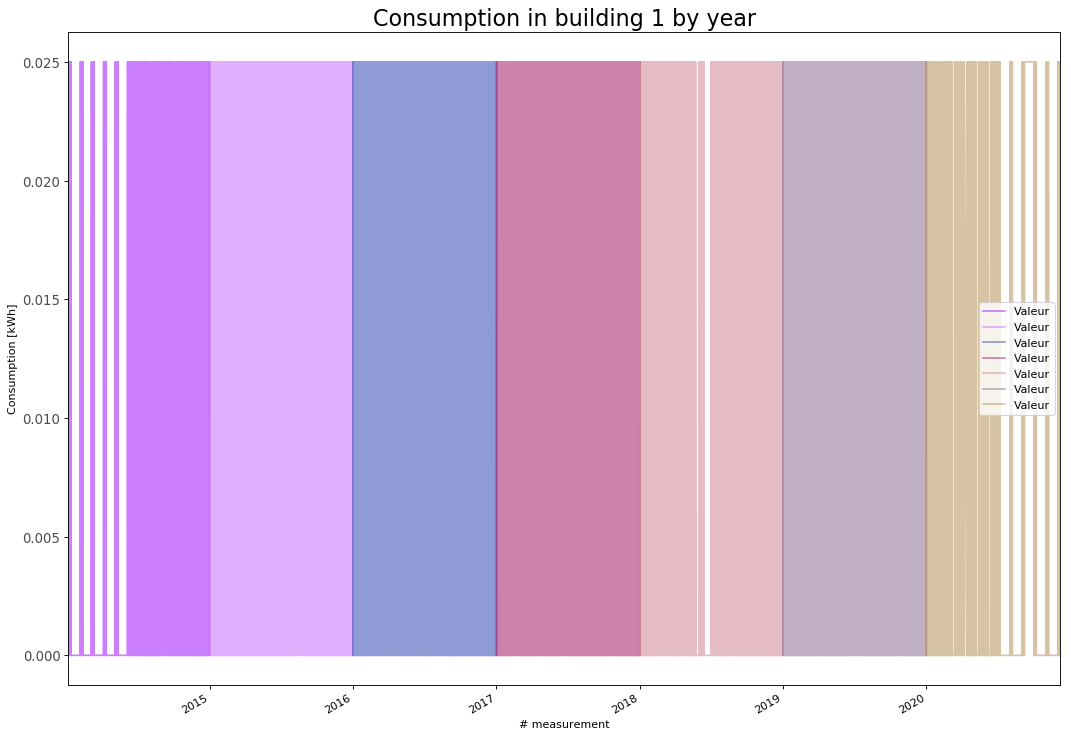

In [7]:
years = data['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False) 

# Draw Plot
fig, ax = plt.subplots(figsize=(16,12), dpi= 80)
for i,year in enumerate(years):
        data_temp=data.loc[data.year==year, :]
        data_temp.plot(y='Valeur', use_index=True, color=mycolors[i], ax=ax, alpha=0.5)

# Decoration
plt.gca().set(ylabel='Consumption [kWh]', xlabel='# measurement')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Consumption in building 1 by year", fontsize=20)
plt.show()